In [1]:
import pennylane as qml
import pennylane.templates as qmlt
import torch

In [2]:
n_qubits = 3
dev = qml.device("default.qubit", wires=n_qubits)

In [3]:
@qml.qnode(qml.device("default.qubit", wires=n_qubits), interface="torch")
def circuit(inputs, weights):
    qmlt.AngleEmbedding(inputs, wires=range(n_qubits))
    qmlt.BasicEntanglerLayers(weights, wires=range(n_qubits))
    return [qml.expval(qml.PauliZ(wires=i)) for i in range(n_qubits)]

In [4]:
inputs = torch.randn(n_qubits)
weights = torch.randn(n_qubits, n_qubits)

In [5]:
print(inputs)
print(weights)

tensor([ 0.7611, -0.5719,  2.1105])
tensor([[ 0.1531,  0.5746,  2.3045],
        [ 1.5238,  2.0860,  0.0123],
        [-0.5463,  0.3833,  0.8613]])


0: ──RX(0.76)───RX(0.15)─╭●────╭X──RX(1.52)─╭●────╭X──RX(-0.55)─╭●────╭X─┤  <Z>
1: ──RX(-0.57)──RX(0.57)─╰X─╭●─│───RX(2.09)─╰X─╭●─│───RX(0.38)──╰X─╭●─│──┤  <Z>
2: ──RX(2.11)───RX(2.30)────╰X─╰●──RX(0.01)────╰X─╰●──RX(0.86)─────╰X─╰●─┤  <Z>


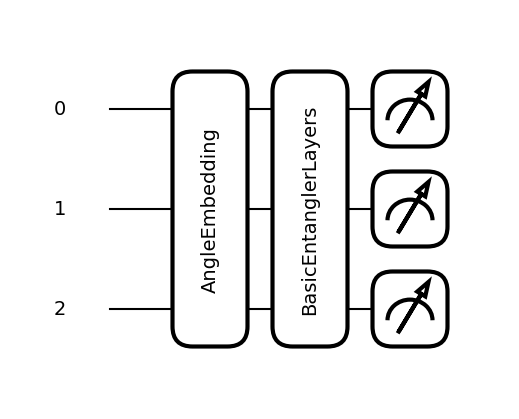

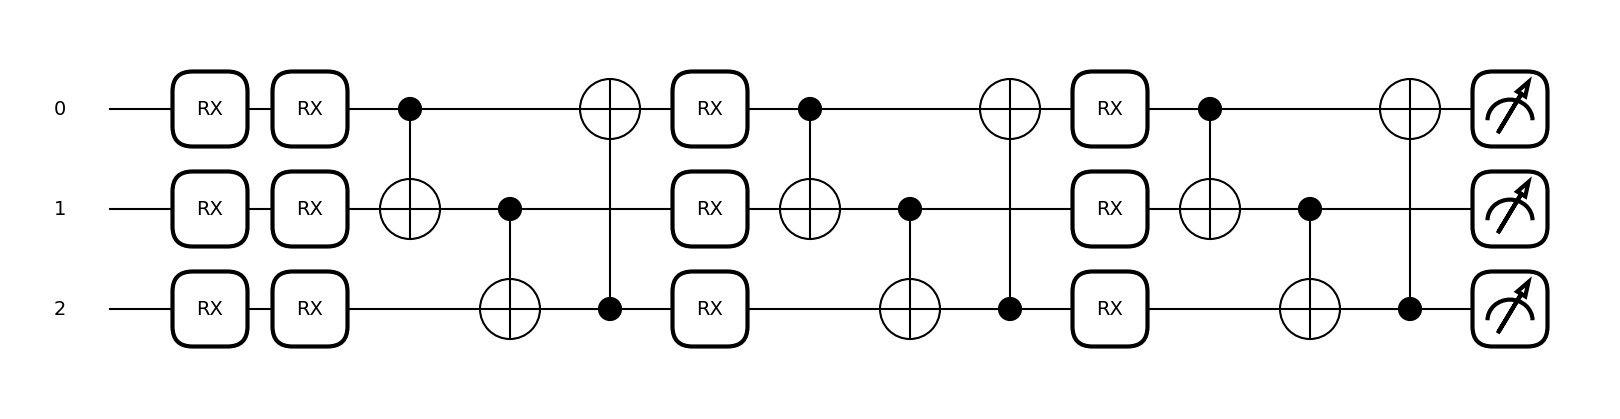

In [6]:
# qml.drawer.use_style("pennylane")
print(qml.draw(circuit, expansion_strategy="device")(inputs, weights))
fig1, ax = qml.draw_mpl(circuit)(inputs, weights)
fig2, ax = qml.draw_mpl(circuit, expansion_strategy="device")(inputs, weights)

In [7]:
# import torch.nn.functional as F

# # Optionally use the context manager to ensure one of the fused kernels is run
# query = torch.rand(32, 8, 128, 64, dtype=torch.float16, device="cuda")
# key = torch.rand(32, 8, 128, 64, dtype=torch.float16, device="cuda")
# value = torch.rand(32, 8, 128, 64, dtype=torch.float16, device="cuda")
# with torch.backends.cuda.sdp_kernel(enable_math=False):
#     F.scaled_dot_product_attention(query, key, value)